In [ ]:
import math
from collections import Counter, defaultdict
from functools import partial
from pprint import pprint

import graphviz
import matplotlib.pyplot as plt
import numpy as np
from numpy import mean
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder


**Mounting Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/result_sql_final_project/join_emp_dist2.csv')

**Cek Data Bernilia Null**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8336 entries, 0 to 8335
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   first_name               8336 non-null   object 
 1   last_name                8336 non-null   object 
 2   gender                   8336 non-null   object 
 3   age                      8336 non-null   float64
 4   length_service           8336 non-null   float64
 5   absent_hours             8336 non-null   float64
 6   distribution_centers_id  8336 non-null   int64  
 7   location                 8336 non-null   object 
 8   latitude                 8336 non-null   float64
 9   longitude                8336 non-null   float64
dtypes: float64(5), int64(1), object(4)
memory usage: 651.4+ KB


In [ ]:
data.head()

,first_name,last_name,gender,age,length_service,absent_hours,distribution_centers_id,location,latitude,longitude
0,Johnson,Ma,F,33.618409,5.562311,22.382281,1,Memphis TN,35.1174,-89.9711
1,Everhart,Tu,F,59.615911,3.317482,164.481558,1,Memphis TN,35.1174,-89.9711
2,Witt,Wm,M,25.642568,2.579772,22.419044,1,Memphis TN,35.1174,-89.9711
3,Rivenburg,Ami,F,45.490932,5.804955,88.510010,1,Memphis TN,35.1174,-89.9711
4,Lopez,Amy,F,51.243750,21.541747,41.738362,1,Memphis TN,35.1174,-89.9711


In [ ]:
data.columns

Index(['first_name', 'last_name', 'gender', 'age', 'length_service',
       'absent_hours', 'distribution_centers_id', 'location', 'latitude',
       'longitude'],
      dtype='object')

In [ ]:
df_hr = pd.DataFrame(data)

**Cek Duplikasi**

In [ ]:
df_hr.duplicated().any()

False

**Deskripsi Data**

In [ ]:
df_hr.describe()

,age,length_service,absent_hours,distribution_centers_id,latitude,longitude
count,8336.000000,8336.000000,8336.000000,8336.000000,8336.000000,8336.000000
mean,42.007086,4.782910,61.283978,5.493762,34.667625,-87.987046
std,9.939798,2.462990,49.038365,2.872447,4.334152,12.073775
min,3.504743,0.012098,0.000000,1.000000,29.760400,-118.250000
25%,35.298748,3.575892,19.127590,3.000000,30.694400,-90.066700
50%,42.114924,4.600248,56.005808,5.000000,32.783300,-88.043100
75%,48.666943,5.623922,94.284692,8.000000,39.950000,-79.933300
max,77.938003,43.735239,272.530123,10.000000,41.836900,-73.783400


**Perbandingan Gender**

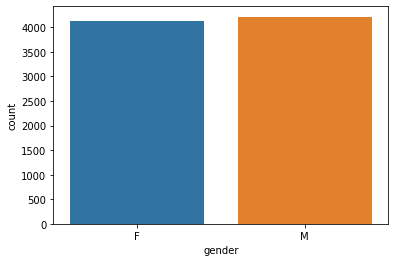

In [ ]:
sns.countplot(x='gender',data=df_hr);
sns.set(rc={'figure.figsize':(10.7,12.27)})

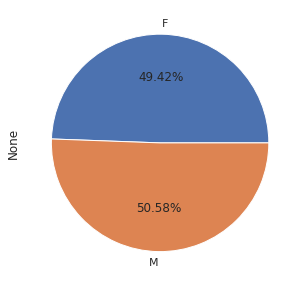

In [ ]:
fig = plt.subplots(figsize=(10, 5))
df_hr.groupby('gender').size().plot(kind='pie', autopct='%.2f%%')

**Distribusi Usia Pegawai**

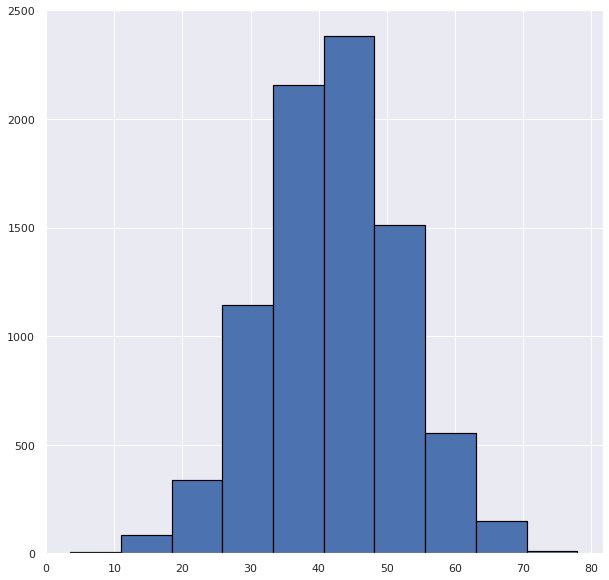

In [ ]:
df_hr['age'].hist(edgecolor='black', linewidth=1.2, figsize=(10, 10));

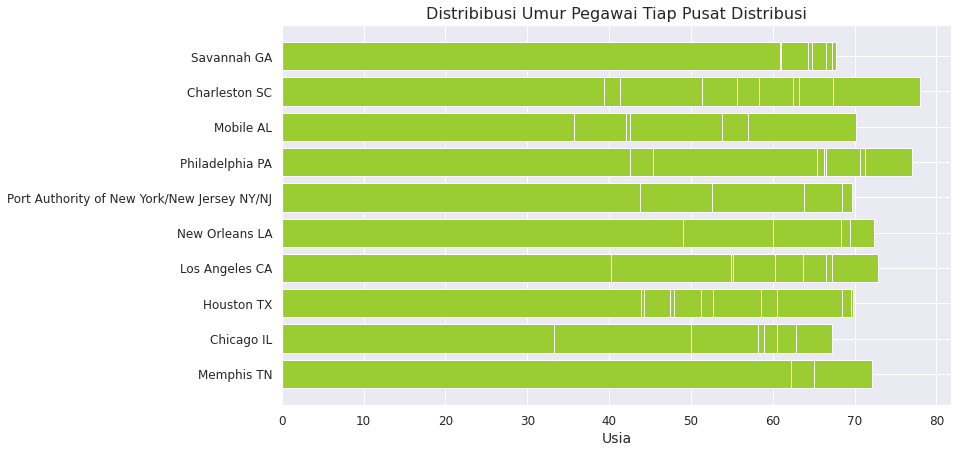

In [ ]:
plt.figure(figsize=(12,7))
plt.barh(df_hr['location'], df_hr['age'], color='yellowgreen')

plt.title('Distribibusi Umur Pegawai Tiap Pusat Distribusi', size=16)
plt.xlabel('Usia', size=14)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()

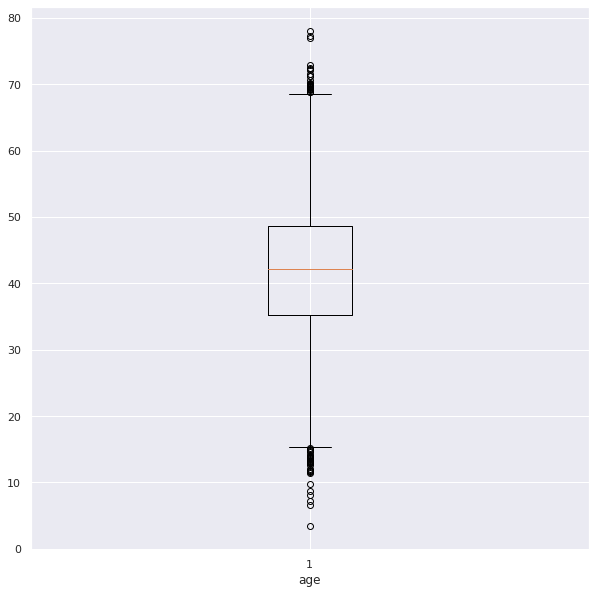

In [ ]:
fig = plt.figure(figsize =(10, 10))
plt.boxplot(df_hr['age'])
plt.xlabel('age')
plt.show()

**Noted:** Dari boxplot diatas terdapat usia pekerja yang berada di usia dibawah 15 tahun bahkan dibawah 10 tahun maka perlu dikaukan filterisasi data

**Distribusi Absensi**

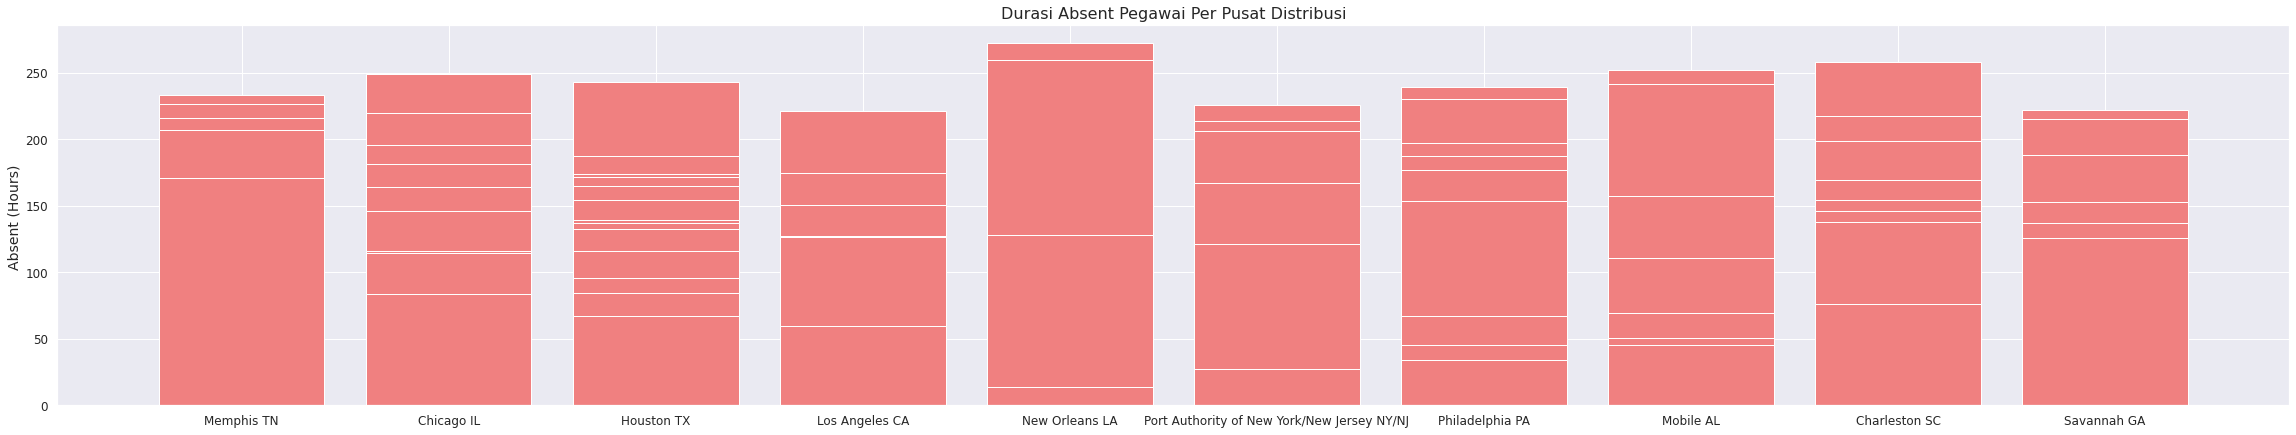

In [ ]:
plt.figure(figsize=(40,7))
plt.bar(df_hr['location'], df_hr['absent_hours'], color='lightcoral')

plt.title('Durasi Absent Pegawai Per Pusat Distribusi', size=16)
plt.ylabel('Absent (Hours) ', size=14)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()

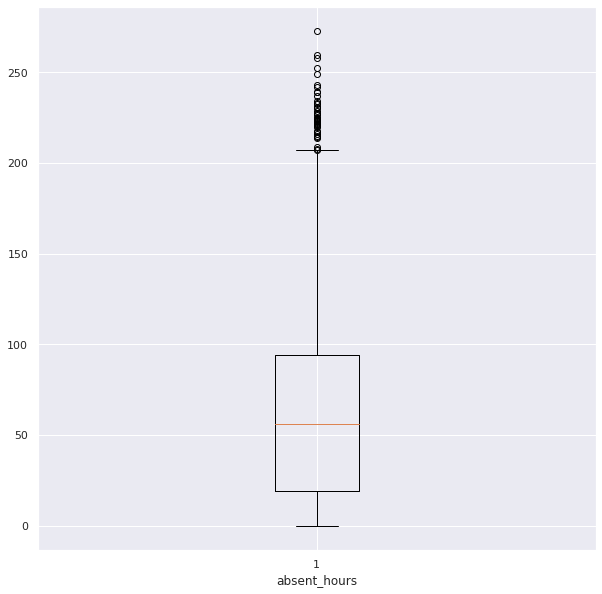

In [ ]:
fig = plt.figure(figsize =(10, 10))
 
# Creating plot
plt.boxplot(df_hr['absent_hours'])
plt.xlabel('absent_hours')
plt.show()

**Distribusi Length Service**

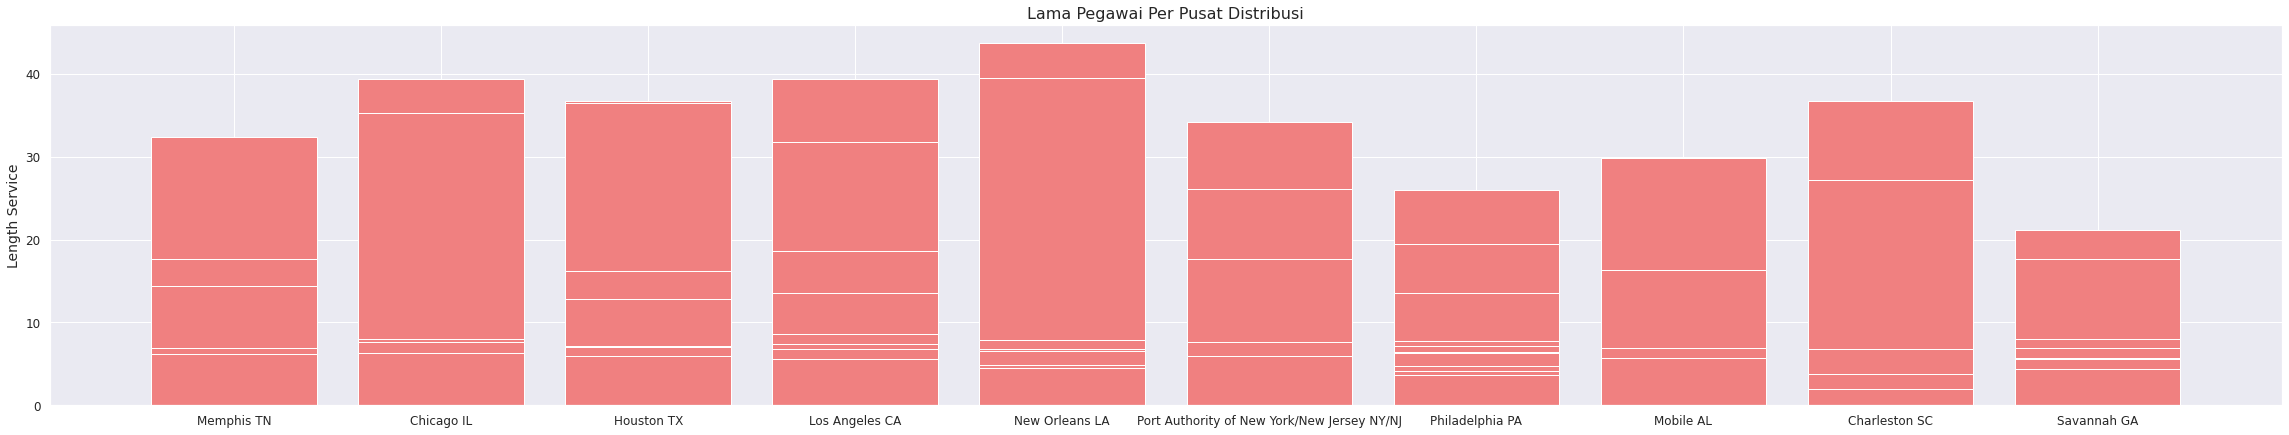

In [ ]:
plt.figure(figsize=(40,7))
plt.bar(df_hr['location'], df_hr['length_service'], color='lightcoral')

plt.title('Lama Pegawai Per Pusat Distribusi', size=16)
plt.ylabel('Length Service', size=14)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()

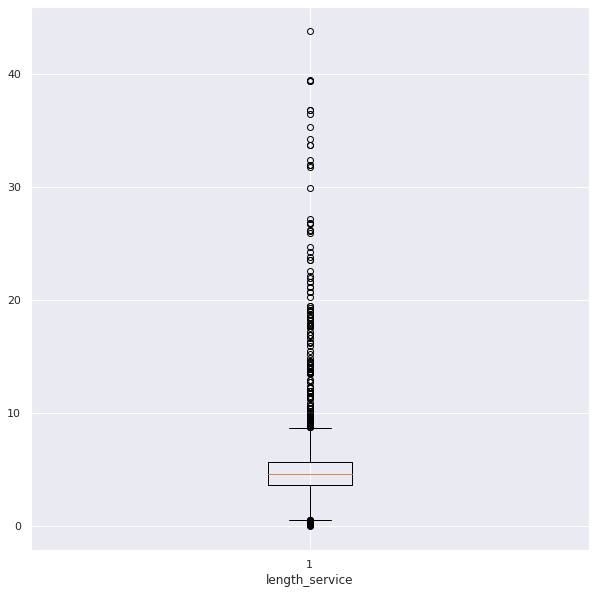

In [ ]:
fig = plt.figure(figsize =(10, 10))
 
# Creating plot
plt.boxplot(df_hr['length_service'])
plt.xlabel('length_service')
plt.show()

**Filtering Data Menghandle Data Usia**

In [ ]:
df_hr_filter = df_hr.loc[df_hr['age']>15]
df_hr_filter

,first_name,last_name,gender,age,length_service,absent_hours,distribution_centers_id,location,latitude,longitude
0,Johnson,Ma,F,33.618409,5.562311,22.382281,1,Memphis TN,35.1174,-89.9711
1,Everhart,Tu,F,59.615911,3.317482,164.481558,1,Memphis TN,35.1174,-89.9711
2,Witt,Wm,M,25.642568,2.579772,22.419044,1,Memphis TN,35.1174,-89.9711
3,Rivenburg,Ami,F,45.490932,5.804955,88.510010,1,Memphis TN,35.1174,-89.9711
4,Lopez,Amy,F,51.243750,21.541747,41.738362,1,Memphis TN,35.1174,-89.9711
...,...,...,...,...,...,...,...,...,...,...
8331,Reed,Conception,F,35.557411,4.626484,78.010781,10,Savannah GA,32.0167,-81.1167
8332,Danielson,Jacqueline,F,35.575873,2.111680,46.350980,10,Savannah GA,32.0167,-81.1167
8333,Faulk,Christopher,M,53.473058,3.539561,137.208622,10,Savannah GA,32.0167,-81.1167
8334,McAdams,Christopher,M,46.459123,5.613185,21.882610,10,Savannah GA,32.0167,-81.1167


In [ ]:
df_hr_filter.to_excel('data_hr.xlsx')
!cp data_hr.xlsx "drive/My Drive/"

In [ ]:
df_hr_filter.describe()

,age,length_service,absent_hours,distribution_centers_id,latitude,longitude
count,8301.000000,8301.000000,8301.000000,8301.00000,8301.000000,8301.000000
mean,42.132489,4.783750,61.542373,5.49488,34.673940,-87.967096
std,9.769477,2.465780,48.979563,2.87442,4.335151,12.058719
min,15.161069,0.012098,0.000000,1.00000,29.760400,-118.250000
25%,35.402630,3.578376,19.741507,3.00000,30.694400,-90.066700
50%,42.171910,4.599104,56.304332,6.00000,32.783300,-88.043100
75%,48.692981,5.623098,94.483993,8.00000,39.950000,-79.933300
max,77.938003,43.735239,272.530123,10.00000,41.836900,-73.783400


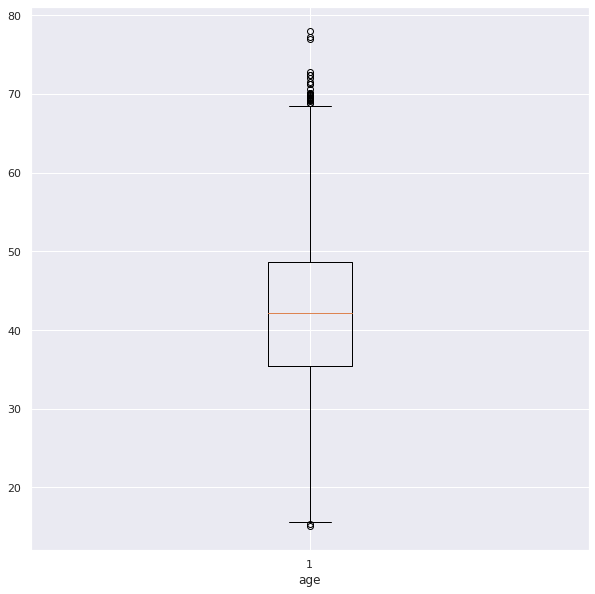

In [ ]:
fig = plt.figure(figsize =(10, 10))
plt.boxplot(df_hr_filter['age'])
plt.xlabel('age')
plt.show()

**Korelasi Antar Variabel**

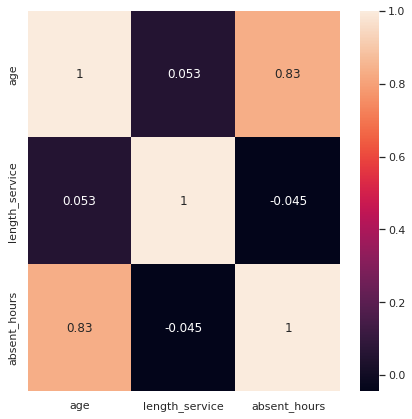

In [ ]:
plt.figure(figsize=(7, 7))
sns.heatmap(df_hr_filter[['age','length_service','absent_hours']].corr(), annot=True)

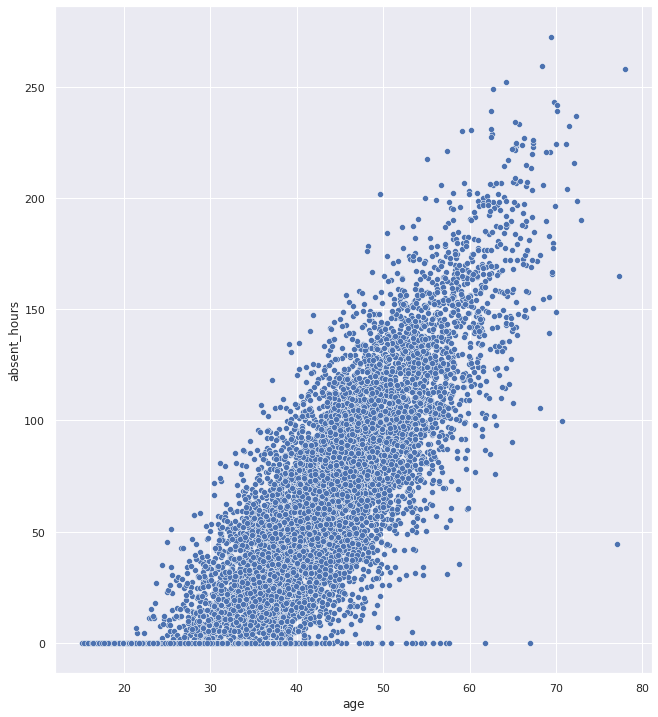

In [ ]:
sns.scatterplot(x="age", y="absent_hours", data=df_hr_filter);
sns.set(rc={'figure.figsize':(40.7,8.27)})

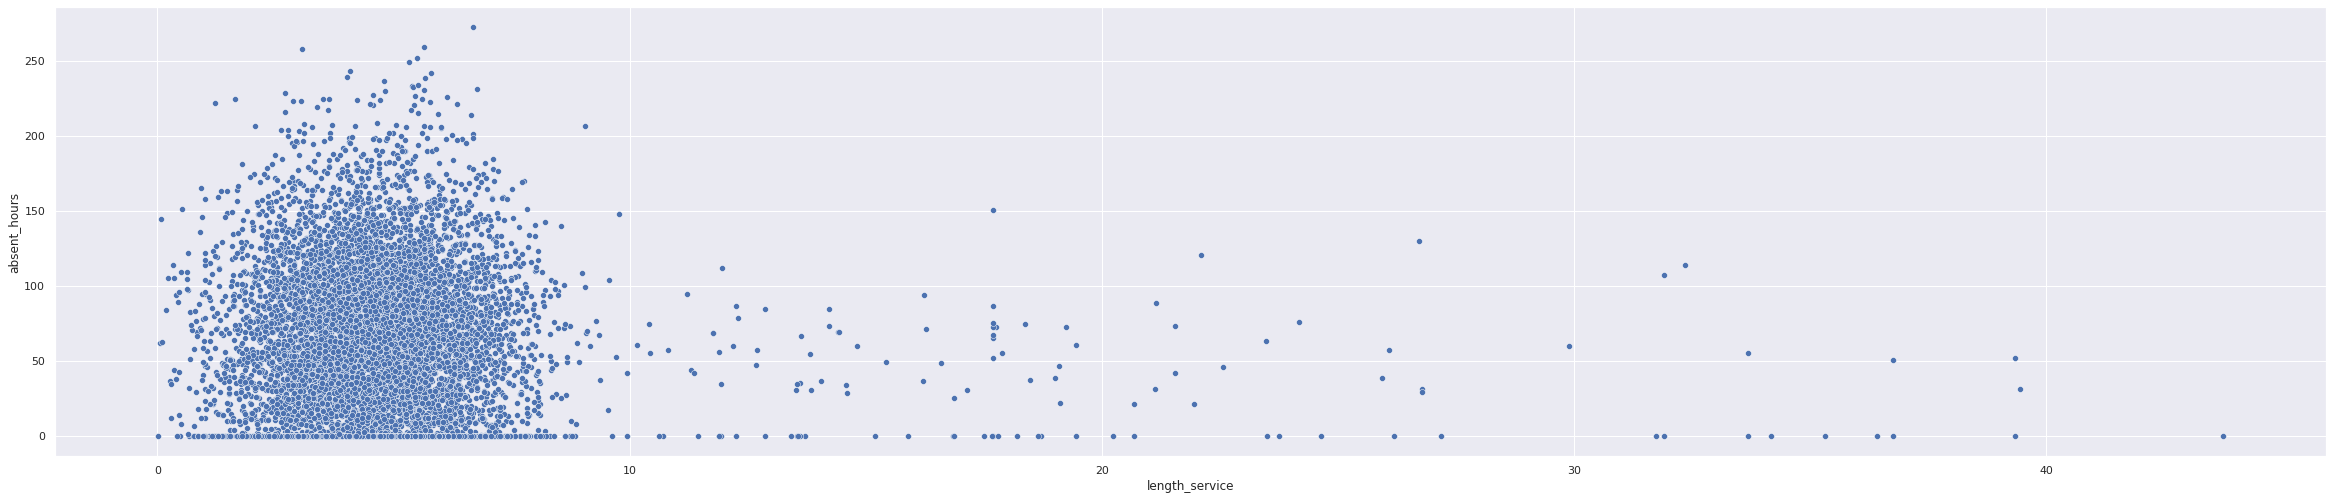

In [ ]:
sns.scatterplot(x="length_service", y="absent_hours", data=df_hr_filter);
sns.set(rc={'figure.figsize':(40.7,8.27)})

Spliting Data

In [ ]:
data_prep = df_hr_filter[['age','length_service','absent_hours', 'distribution_centers_id']]

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

X = data_prep.drop(['absent_hours'], axis=1)
y = np.where(data_prep["absent_hours"] > df_hr_filter["absent_hours"].mean(), 1, -1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

pipe = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
])

X_train = pipe.fit_transform(X_train)
X_test = pipe.transform(X_test)

**Deklarasi Evaluasi Model**

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

**Logistic Linier Model**

In [ ]:
from sklearn.linear_model import LogisticRegression

print("\n=========LOGISTIC REGRESSION============")
lr_clf = LogisticRegression(solver='liblinear', penalty='l2')
lr_clf.fit(X_train, y_train)
evaluate(lr_clf, X_train, X_test, y_train, y_test)


=========LOGISTIC REGRESSION============
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[2688  464]
 [ 491 2167]]
ACCURACY SCORE:
0.8356
CLASSIFICATION REPORT:
                    -1            1  accuracy    macro avg  weighted avg
precision     0.845549     0.823641  0.835628     0.834595      0.835526
recall        0.852792     0.815275  0.835628     0.834033      0.835628
f1-score      0.849155     0.819437  0.835628     0.834296      0.835559
support    3152.000000  2658.000000  0.835628  5810.000000   5810.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[1118  173]
 [ 230  970]]
ACCURACY SCORE:
0.8382
CLASSIFICATION REPORT:
                    -1            1  accuracy    macro avg  weighted avg
precision     0.829377     0.848644  0.838218     0.839010      0.838658
recall        0.865995     0.808333  0.838218     0.837164      0.838218
f1-score      0.847291     0.827998  0.838218     0.837644      0.837997
support    1291.000000  1200.000000  0.838218  2491.000000   2491.000000


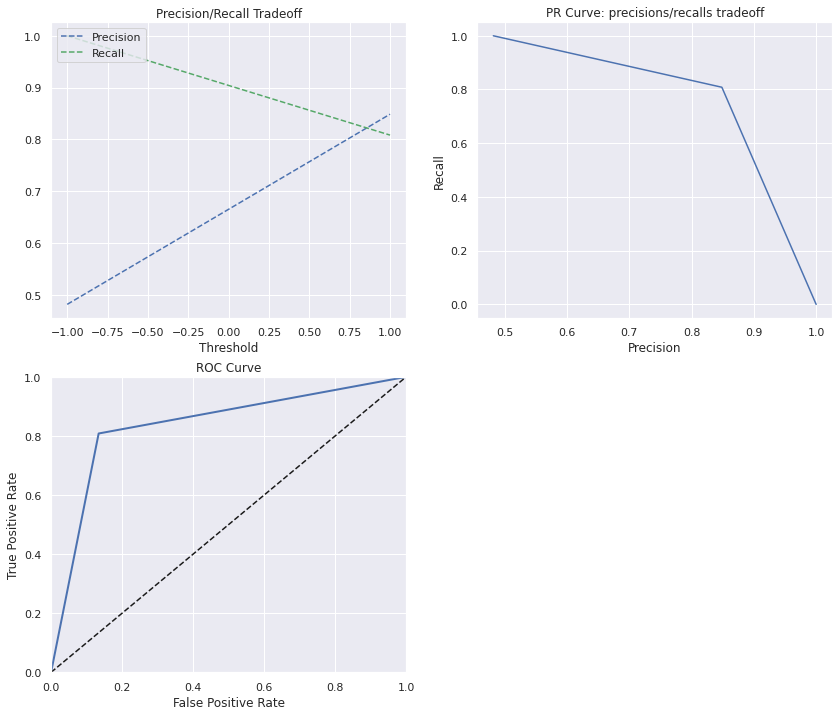

In [ ]:
from sklearn.metrics import precision_recall_curve, roc_curve

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.title("Precision/Recall Tradeoff")
    

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    
    
precisions, recalls, thresholds = precision_recall_curve(y_test, lr_clf.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

plt.subplot(4, 2, 3)
fpr, tpr, thresholds = roc_curve(y_test, lr_clf.predict(X_test))
plot_roc_curve(fpr, tpr)

In [ ]:
scores_dict = {
    'Logistic Regression': {
        'Train': accuracy_score(y_train, lr_clf.predict(X_train)),
        'Test': accuracy_score(y_test, lr_clf.predict(X_test)),
    },
}

In [ ]:
scores = cross_val_score(lr_clf, X_train, y_train, cv=10)
print(f"Cross-Validation score mean: {scores.mean() * 100:.2f}% (+/-{scores.std() * 100:.2f})")

Cross-Validation score mean: 83.43% (+/-1.18)


In [ ]:
feature_name = X.columns
summary_table = pd.DataFrame(columns=["Features_name"], data=feature_name)
summary_table["Coefficients"] = np.transpose(lr_clf.coef_)
summary_table

,Features_name,Coefficients
0,age,15.161945
1,length_service,-3.350040
2,distribution_centers_id,0.065398


In [ ]:
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', lr_clf.intercept_[0]]
summary_table.sort_index(inplace=True)

In [ ]:
summary_table["Odds_ratio"] = np.exp(summary_table.Coefficients)
summary_table.sort_values(by="Odds_ratio", ascending=True)

,Features_name,Coefficients,Odds_ratio
1,length_service,-3.350040,3.508295e-02
2,distribution_centers_id,0.065398,1.067584e+00
0,age,15.161945,3.843697e+06


**SVM Model**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [50, 70, 75, 65 ], 
              'gamma': [0.002, 0.001, 0.0009, 0.0008, 0.0007], 
              'kernel': ['rbf', 'poly', 'linear']} 

svm_cv = GridSearchCV(SVC(), param_grid, scoring='accuracy', verbose=1, cv=3)
svm_cv.fit(X_train, y_train)

best_params = svm_cv.best_params_
print(f"Best params: {best_params}")

svm_clf = SVC(**best_params)
svm_clf.fit(X_train, y_train)
evaluate(svm_clf, X_train, X_test, y_train, y_test)

Fitting 3 folds for each of 60 candidates, totalling 180 fits
Best params: {'C': 65, 'gamma': 0.002, 'kernel': 'rbf'}
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[2681  471]
 [ 487 2171]]
ACCURACY SCORE:
0.8351
CLASSIFICATION REPORT:
                    -1            1  accuracy    macro avg  weighted avg
precision     0.846275     0.821726  0.835112     0.834001      0.835044
recall        0.850571     0.816780  0.835112     0.833675      0.835112
f1-score      0.848418     0.819245  0.835112     0.833832      0.835072
support    3152.000000  2658.000000  0.835112  5810.000000   5810.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[1114  177]
 [ 229  971]]
ACCURACY SCORE:
0.8370
CLASSIFICATION REPORT:
                    -1            1  accuracy    macro avg  weighted avg
precision     0.829486     0.845819  0.837013     0.837653      0.837354
recall        0.862897     0.809167  0.837013     0.836032      0.837013
f1-score      0.845862     0.827087  0.837013     0.836474      0.836817
support

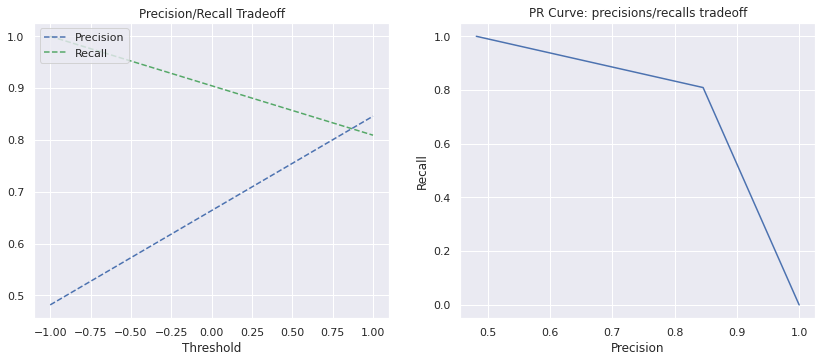

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_test, svm_clf.predict(X_test))
plt.figure(figsize=(14, 25))
plt.subplot(4, 2, 1)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.subplot(4, 2, 2)
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");


In [ ]:
scores_dict['Support Vector Machine'] = {
        'Train': accuracy_score(y_train, svm_clf.predict(X_train)),
        'Test': accuracy_score(y_test, svm_clf.predict(X_test)),
    }

**Score Evaluasi**

In [ ]:
scores_dict

{'Logistic Regression': {'Test': 0.8382175832998796,
  'Train': 0.8356282271944923},
 'Support Vector Machine': {'Test': 0.83701324769169,
  'Train': 0.8351118760757315}}